<a href="https://colab.research.google.com/github/psps-projects/Forest-Fire-Prediction/blob/main/project_1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py

In [ ]:
# **Importing the dataset**

In [ ]:
dataset=pd.read_csv("DATA FOR PROJECT (1).csv")

In [ ]:
dataset.head()

,aes,wmo,temp,td,rh,ws,wg,wdir,pres,vis,...,rndays,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,Fire/Not Fire
0,1012475,71031,9.5,8.6,94.0,8.6,23.2,261,1007.7,24.5,...,0,0.0,8.9,0.1,85.6,0.1,0.0,0.0,0.0,0.0
1,1012710,71798,10.2,6.2,76.0,35.8,45.7,252,1007.8,24.7,...,0,0.0,35.6,0.3,1.5,0.4,0.1,0.0,0.0,0.0
2,1014820,71774,9.4,5.5,76.9,23.4,NaN,255,1006.6,39.6,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1015630,71927,11.6,4.4,61.0,12.0,24.1,257,1007.0,39.8,...,0,0.0,36.9,0.5,1.8,0.6,0.0,0.0,0.0,0.0
4,1016640,71778,9.2,6.9,85.0,45.0,54.0,259,1008.8,26.6,...,0,0.0,28.8,0.2,1.4,0.2,0.0,0.0,0.0,0.0


In [ ]:
dataset.tail()

,aes,wmo,temp,td,rh,ws,wg,wdir,pres,vis,...,rndays,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,Fire/Not Fire
754607,8502580,718143,21.5,13.1,58.0,34.6,NaN,230,1009.00,19.5,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754608,8502592,71339,21.6,9.7,46.0,35.3,NaN,219,1015.50,16.1,...,0,0.0,81.7,8.6,53.5,12.3,8.2,9.4,1.4,1.0
754609,8502801,71902,18.3,12.0,66.0,31.0,NaN,291,1006.40,17.7,...,0,0.0,67.1,4.9,28.4,6.8,2.7,2.1,0.1,0.0
754610,8503249,71335,15.9,11.6,75.7,24.1,NaN,290,1008.65,17.2,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754611,8504175,71825,12.1,11.4,96.0,7.6,NaN,250,1013.70,9.7,...,0,0.0,10.4,3.1,63.4,5.6,0.0,0.0,0.0,0.0


In [ ]:
dataset.shape

(754612, 21)

In [ ]:
dataset.dtypes

aes               object
wmo                int64
temp             float64
td               float64
rh               float64
ws               float64
wg               float64
wdir               int64
pres             float64
vis              float64
precip           float64
rndays             int64
sog              float64
ffmc             float64
dmc              float64
dc               float64
bui              float64
isi              float64
fwi              float64
dsr              float64
Fire/Not Fire    float64
dtype: object

In [ ]:
dataset.count()

aes              754612
wmo              754612
temp             754612
td               753395
rh               754297
ws               754612
wg               505324
wdir             754612
pres             754612
vis              754612
precip           754606
rndays           754612
sog              754211
ffmc             356350
dmc              356350
dc               356350
bui              331513
isi              331513
fwi              331511
dsr              331513
Fire/Not Fire    331171
dtype: int64

In [ ]:
dataset.describe()

,wmo,temp,td,rh,ws,wg,wdir,pres,vis,precip,rndays,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,Fire/Not Fire
count,754612.000000,754612.000000,753395.000000,754297.000000,754612.000000,505324.000000,754612.000000,754612.000000,754612.000000,754606.000000,754612.000000,754211.000000,356350.000000,356350.000000,356350.000000,331513.000000,331513.000000,331511.000000,331513.000000,331171.000000
mean,124242.705284,4.312816,-2.683438,64.691775,15.509444,21.874862,202.346402,1013.862838,22.221685,2.045405,2.388090,6.866321,71.858225,24.751470,234.138806,37.201989,5.046056,10.537483,3.672935,0.501309
std,176422.137155,14.341734,12.562019,20.058945,10.295933,13.711197,99.249900,36.451693,11.174547,6.864991,12.043255,16.885212,21.487024,28.841217,198.661422,39.147795,7.166045,13.979376,8.937813,0.499999
min,71001.000000,-53.600000,-55.400000,-77.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.690000,0.000000,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71276.000000,-4.000000,-9.500000,50.000000,7.800000,11.400000,126.000000,1009.200000,16.000000,0.000000,0.000000,0.000000,61.100000,5.700000,67.500000,9.700000,0.900000,0.600000,0.000000,0.000000
50%,71514.000000,5.700000,-1.200000,67.000000,13.400000,19.200000,219.000000,1015.150000,20.700000,0.010000,1.000000,0.000000,81.200000,15.200000,191.600000,24.500000,2.900000,5.300000,0.500000,1.000000
75%,71793.000000,15.200000,6.500000,80.000000,20.600000,29.600000,285.000000,1021.200000,24.400000,1.200000,3.000000,2.000000,87.500000,33.300000,354.475000,51.300000,6.700000,15.300000,3.400000,1.000000
max,719179.000000,43.500000,29.000000,100.000000,149.900000,149.500000,360.000000,1067.400000,96.500000,497.500000,666.000000,236.000000,98.900000,359.700000,1197.900000,380.700000,363.800000,203.500000,331.600000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754612 entries, 0 to 754611
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   aes            754612 non-null  object 
 1   wmo            754612 non-null  int64  
 2   temp           754612 non-null  float64
 3   td             753395 non-null  float64
 4   rh             754297 non-null  float64
 5   ws             754612 non-null  float64
 6   wg             505324 non-null  float64
 7   wdir           754612 non-null  int64  
 8   pres           754612 non-null  float64
 9   vis            754612 non-null  float64
 10  precip         754606 non-null  float64
 11  rndays         754612 non-null  int64  
 12  sog            754211 non-null  float64
 13  ffmc           356350 non-null  float64
 14  dmc            356350 non-null  float64
 15  dc             356350 non-null  float64
 16  bui            331513 non-null  float64
 17  isi            331513 non-nul

In [ ]:
dataset.isna()

,aes,wmo,temp,td,rh,ws,wg,wdir,pres,vis,...,rndays,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,Fire/Not Fire
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754607,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,True,True,True,True,True
754608,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
754609,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
754610,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,True,True,True,True,True


In [ ]:
# **Data Visualization**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


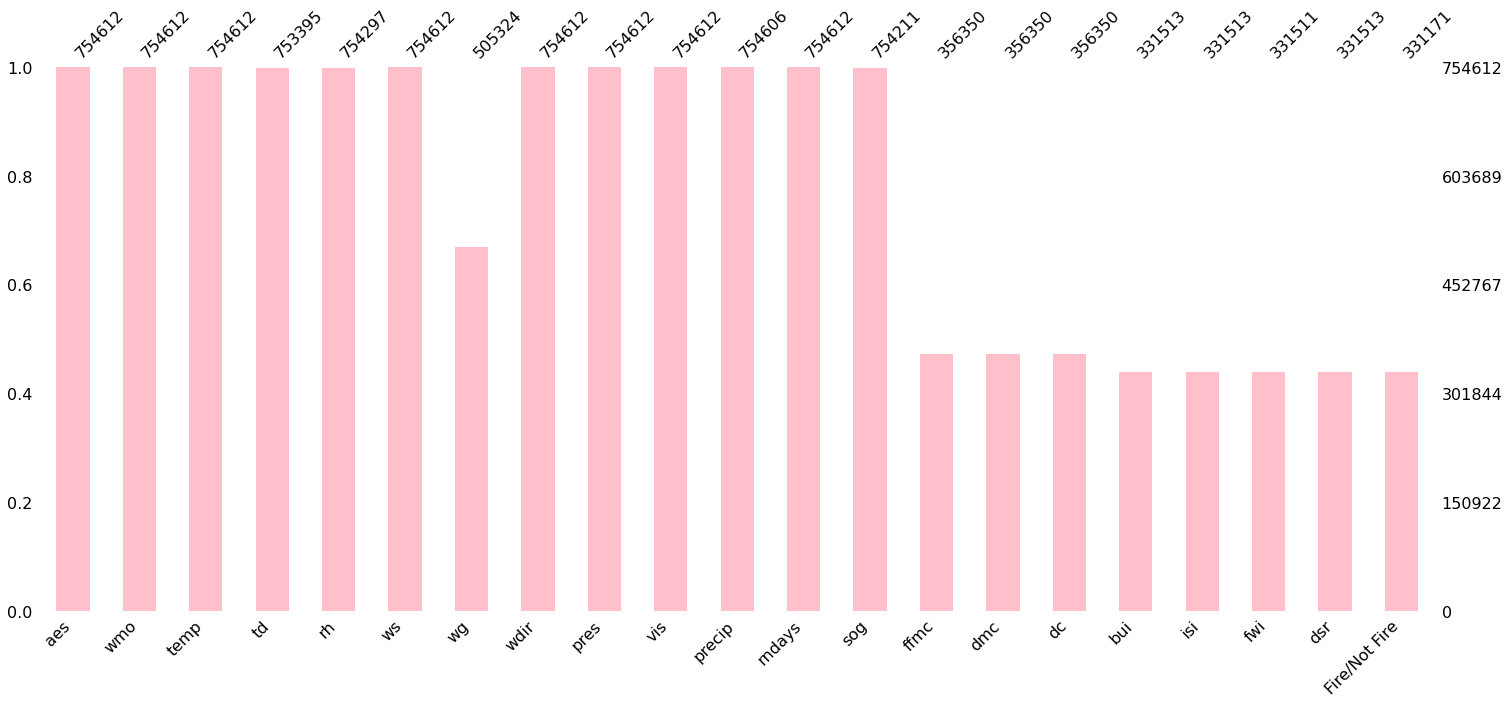

In [ ]:
get_ipython().system('pip install missingno')
import missingno as msno
msno.bar(dataset,color='pink')
plt.show()

In [ ]:
# Finding the locations of the missing value

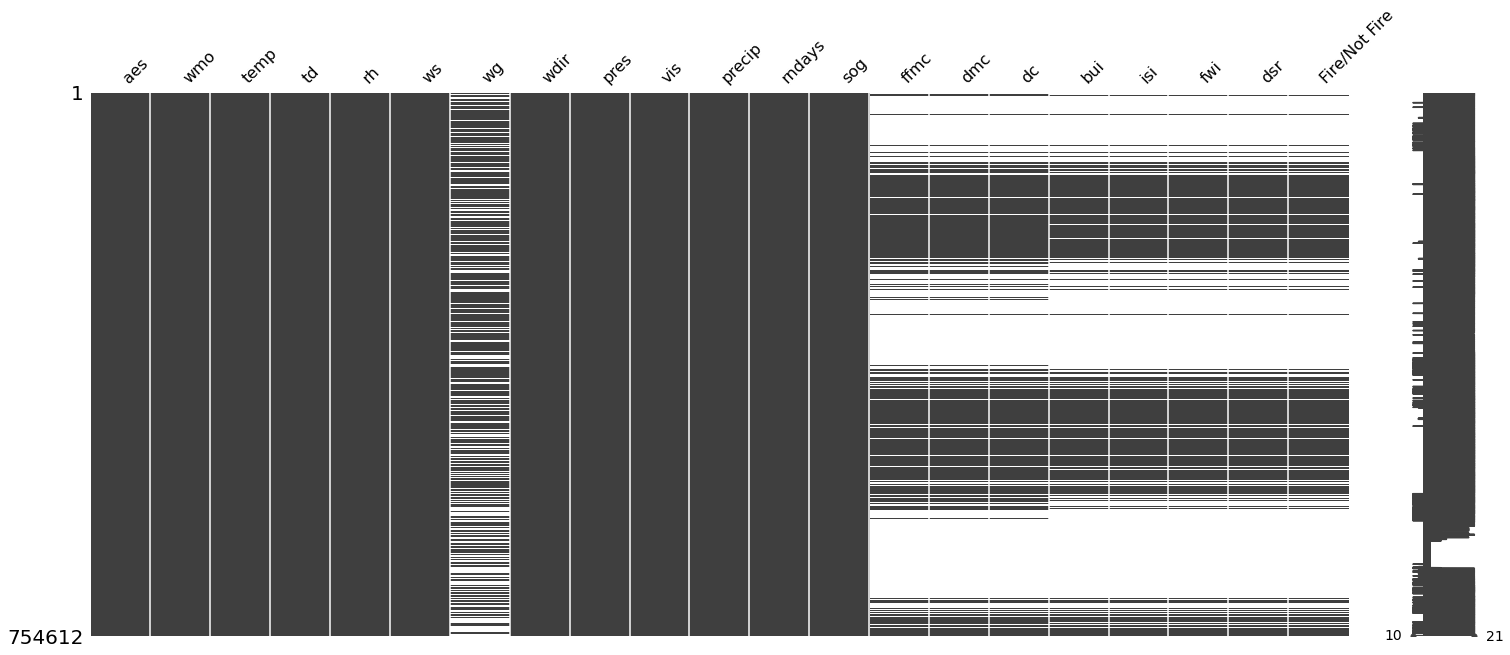

In [ ]:
msno.matrix(dataset)
plt.show()

In [ ]:
##calculating the percentage of missing values in each column

In [ ]:
dataset.isna().sum()/dataset.shape[0]

aes              0.000000
wmo              0.000000
temp             0.000000
td               0.001613
rh               0.000417
ws               0.000000
wg               0.330353
wdir             0.000000
pres             0.000000
vis              0.000000
precip           0.000008
rndays           0.000000
sog              0.000531
ffmc             0.527771
dmc              0.527771
dc               0.527771
bui              0.560684
isi              0.560684
fwi              0.560687
dsr              0.560684
Fire/Not Fire    0.561137
dtype: float64

In [ ]:
# **Dropping rows and columns corresponding to missing values**

In [ ]:
print(dataset)

            aes     wmo  temp    td    rh    ws    wg  wdir     pres   vis  \
0       1012475   71031   9.5   8.6  94.0   8.6  23.2   261  1007.70  24.5   
1       1012710   71798  10.2   6.2  76.0  35.8  45.7   252  1007.80  24.7   
2       1014820   71774   9.4   5.5  76.9  23.4   NaN   255  1006.60  39.6   
3       1015630   71927  11.6   4.4  61.0  12.0  24.1   257  1007.00  39.8   
4       1016640   71778   9.2   6.9  85.0  45.0  54.0   259  1008.80  26.6   
...         ...     ...   ...   ...   ...   ...   ...   ...      ...   ...   
754607  8502580  718143  21.5  13.1  58.0  34.6   NaN   230  1009.00  19.5   
754608  8502592   71339  21.6   9.7  46.0  35.3   NaN   219  1015.50  16.1   
754609  8502801   71902  18.3  12.0  66.0  31.0   NaN   291  1006.40  17.7   
754610  8503249   71335  15.9  11.6  75.7  24.1   NaN   290  1008.65  17.2   
754611  8504175   71825  12.1  11.4  96.0   7.6   NaN   250  1013.70   9.7   

        ...  rndays  sog  ffmc  dmc    dc   bui  isi  fwi  dsr 

In [ ]:
##dropping columns with high percentage of missing values

In [ ]:
df=dataset.drop(columns=['aes','ffmc','dmc','dc','bui','isi','fwi','dsr','wmo'])

In [ ]:
##dropping the rows for missing dependent variables

In [ ]:
df.dropna(subset=["Fire/Not Fire"],axis=0, inplace=True)
print(df)

        temp    td    rh    ws    wg  wdir    pres   vis  precip  rndays  sog  \
0        9.5   8.6  94.0   8.6  23.2   261  1007.7  24.5   20.52       0  0.0   
1       10.2   6.2  76.0  35.8  45.7   252  1007.8  24.7   23.80       0  0.0   
3       11.6   4.4  61.0  12.0  24.1   257  1007.0  39.8    6.20       0  0.0   
4        9.2   6.9  85.0  45.0  54.0   259  1008.8  26.6   21.42       0  0.0   
6       12.8   5.7  62.0  19.4  24.3   215  1007.4  28.2    6.00       0  0.0   
...      ...   ...   ...   ...   ...   ...     ...   ...     ...     ...  ...   
754605  16.9  12.4  75.0  21.7   NaN   219  1013.1  24.1    3.00       0  0.0   
754606  20.6  13.9  66.0  29.1   NaN   239  1007.1  19.0    3.80       0  0.0   
754608  21.6   9.7  46.0  35.3   NaN   219  1015.5  16.1    0.50       0  0.0   
754609  18.3  12.0  66.0  31.0   NaN   291  1006.4  17.7    4.61       0  0.0   
754611  12.1  11.4  96.0   7.6   NaN   250  1013.7   9.7   11.10       0  0.0   

        Fire/Not Fire  
0  

In [ ]:
df.count()

temp             331171
td               331023
rh               331128
ws               331171
wg               231642
wdir             331171
pres             331171
vis              331171
precip           331165
rndays           331171
sog              330813
Fire/Not Fire    331171
dtype: int64

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
##calculating the skewness of each row to check what kind of imputation to consider 

In [ ]:
from scipy.stats import skew
df.skew(axis = 0, skipna = True)

temp              -0.191087
td                -0.319334
rh                 0.063509
ws                 1.304666
wg                 1.100895
wdir              -0.359293
pres             -44.164837
vis                2.122527
precip             9.345478
rndays            47.560751
sog              281.729884
Fire/Not Fire     -0.005236
dtype: float64

In [ ]:
# **Imputation using mean for the missing data**

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x)
x=imputer.transform(x)

In [ ]:
# Transform the dataset containing missing values

In [ ]:
x=pd.DataFrame(x,columns=["temp","td","rh","ws","wg","wdir","pres","vis","precip","rndays","sog"])
x.count()

temp      331171
td        331171
rh        331171
ws        331171
wg        331171
wdir      331171
pres      331171
vis       331171
precip    331171
rndays    331171
sog       331171
dtype: int64

In [ ]:
print(x)

        temp    td    rh    ws         wg   wdir    pres   vis  precip  \
0        9.5   8.6  94.0   8.6  23.200000  261.0  1007.7  24.5   20.52   
1       10.2   6.2  76.0  35.8  45.700000  252.0  1007.8  24.7   23.80   
2       11.6   4.4  61.0  12.0  24.100000  257.0  1007.0  39.8    6.20   
3        9.2   6.9  85.0  45.0  54.000000  259.0  1008.8  26.6   21.42   
4       12.8   5.7  62.0  19.4  24.300000  215.0  1007.4  28.2    6.00   
...      ...   ...   ...   ...        ...    ...     ...   ...     ...   
331166  16.9  12.4  75.0  21.7  22.107321  219.0  1013.1  24.1    3.00   
331167  20.6  13.9  66.0  29.1  22.107321  239.0  1007.1  19.0    3.80   
331168  21.6   9.7  46.0  35.3  22.107321  219.0  1015.5  16.1    0.50   
331169  18.3  12.0  66.0  31.0  22.107321  291.0  1006.4  17.7    4.61   
331170  12.1  11.4  96.0   7.6  22.107321  250.0  1013.7   9.7   11.10   

        rndays  sog  
0          0.0  0.0  
1          0.0  0.0  
2          0.0  0.0  
3          0.0  0.0  
4

In [ ]:
y=pd.DataFrame(y,columns=["Fire/Not Fire"])
y.count()

Fire/Not Fire    331171
dtype: int64

In [ ]:
df1 = pd.concat([x,y], axis=1)
print(df1)

        temp    td    rh    ws         wg   wdir    pres   vis  precip  \
0        9.5   8.6  94.0   8.6  23.200000  261.0  1007.7  24.5   20.52   
1       10.2   6.2  76.0  35.8  45.700000  252.0  1007.8  24.7   23.80   
2       11.6   4.4  61.0  12.0  24.100000  257.0  1007.0  39.8    6.20   
3        9.2   6.9  85.0  45.0  54.000000  259.0  1008.8  26.6   21.42   
4       12.8   5.7  62.0  19.4  24.300000  215.0  1007.4  28.2    6.00   
...      ...   ...   ...   ...        ...    ...     ...   ...     ...   
331166  16.9  12.4  75.0  21.7  22.107321  219.0  1013.1  24.1    3.00   
331167  20.6  13.9  66.0  29.1  22.107321  239.0  1007.1  19.0    3.80   
331168  21.6   9.7  46.0  35.3  22.107321  219.0  1015.5  16.1    0.50   
331169  18.3  12.0  66.0  31.0  22.107321  291.0  1006.4  17.7    4.61   
331170  12.1  11.4  96.0   7.6  22.107321  250.0  1013.7   9.7   11.10   

        rndays  sog  Fire/Not Fire  
0          0.0  0.0            0.0  
1          0.0  0.0            0.0  


In [ ]:
# Preprocessing of Data

In [ ]:
print(x)
print(y)

        temp    td    rh    ws         wg   wdir    pres   vis  precip  \
0        9.5   8.6  94.0   8.6  23.200000  261.0  1007.7  24.5   20.52   
1       10.2   6.2  76.0  35.8  45.700000  252.0  1007.8  24.7   23.80   
2       11.6   4.4  61.0  12.0  24.100000  257.0  1007.0  39.8    6.20   
3        9.2   6.9  85.0  45.0  54.000000  259.0  1008.8  26.6   21.42   
4       12.8   5.7  62.0  19.4  24.300000  215.0  1007.4  28.2    6.00   
...      ...   ...   ...   ...        ...    ...     ...   ...     ...   
331166  16.9  12.4  75.0  21.7  22.107321  219.0  1013.1  24.1    3.00   
331167  20.6  13.9  66.0  29.1  22.107321  239.0  1007.1  19.0    3.80   
331168  21.6   9.7  46.0  35.3  22.107321  219.0  1015.5  16.1    0.50   
331169  18.3  12.0  66.0  31.0  22.107321  291.0  1006.4  17.7    4.61   
331170  12.1  11.4  96.0   7.6  22.107321  250.0  1013.7   9.7   11.10   

        rndays  sog  
0          0.0  0.0  
1          0.0  0.0  
2          0.0  0.0  
3          0.0  0.0  
4

In [ ]:
# **VISUALIZATION OF THE CLEAN DATA**

# **Bar Plot**

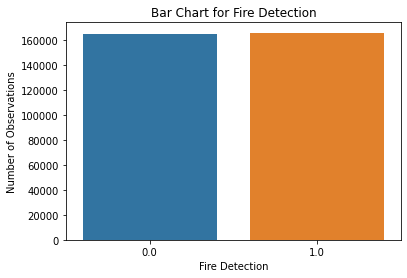

In [ ]:
sns.countplot(x='Fire/Not Fire',data=df)
plt.xlabel('Fire Detection')
plt.ylabel('Number of Observations')
plt.title('Bar Chart for Fire Detection')
plt.show()

In [ ]:
# **PIE-CHART**

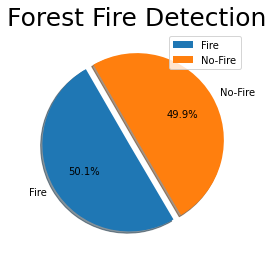

In [ ]:
import matplotlib.pyplot as plt
values=df1['Fire/Not Fire'].value_counts()
labels=['Fire','No-Fire']
plt.pie(values,labels=labels,radius = 1,explode = (0.1, 0),shadow=True,startangle=120,autopct='%1.1f%%') 
plt.title('Forest Fire Detection',fontsize=25)
plt.legend()
plt.show()

In [ ]:
# **Correlation Heatmap**

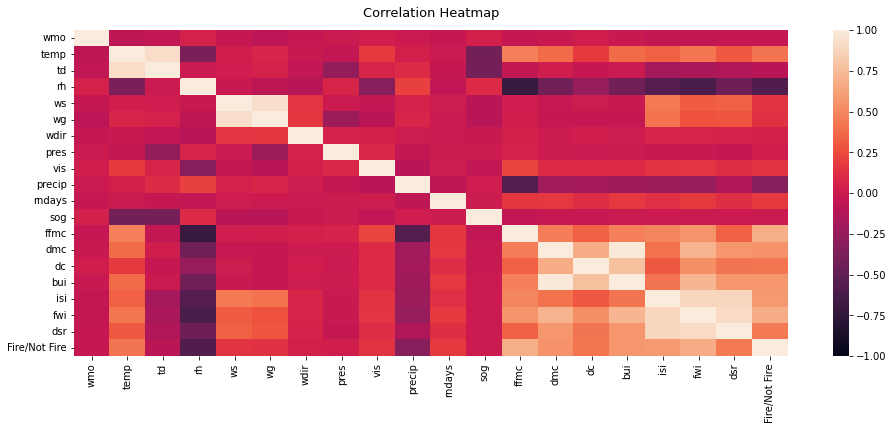

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=13)
plt.show()

In [ ]:
# **Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

        temp    td    rh    ws         wg   wdir     pres   vis  precip  \
95299   21.0  17.0  78.0  18.5  18.500000  200.0  1008.20  14.5    0.50   
204139  26.0  21.0  74.0  20.4  37.000000  210.0  1015.80  48.3   11.38   
67006   21.5  12.0  54.8  14.8  19.500000  270.0  1017.10  19.2    0.00   
41357    7.0   2.0  70.8  22.2  22.200000   90.0  1014.90  24.1   15.97   
297587  -1.5  -6.4  70.1  13.0  22.107321  324.0  1027.19  19.3    3.88   
...      ...   ...   ...   ...        ...    ...      ...   ...     ...   
232422  16.1   8.7  61.9   5.9  22.107321  149.0  1015.34  20.2    0.40   
124605  16.0   7.0  55.4  22.2  22.200000  280.0  1016.00  24.1    6.81   
20463   13.0   9.0  76.9  31.5  48.200000  200.0  1017.40  24.1    0.00   
18638   17.0   3.3  40.0   5.5  22.107321  158.0  1019.40  14.6    0.00   
297827  14.0   4.0  51.0   3.6  22.107321  353.0  1014.90  16.1    1.20   

        rndays  sog  
95299      0.0  0.0  
204139     0.0  0.0  
67006      5.0  0.0  
41357      

In [ ]:
# **Feature Scaling of the independent variables** 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

In [ ]:
z=['temp','td','rh','ws','wg','wdir','pres','vis','precip','rndays','sog']

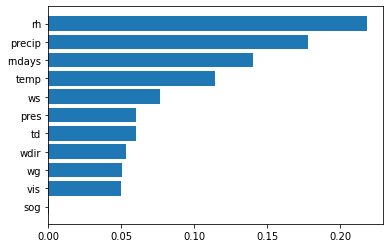

In [ ]:
f_i = list(zip(z,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
rf.feature_importances_

array([1.13998099e-01, 5.98361890e-02, 2.18255793e-01, 7.64261939e-02,
       5.05860754e-02, 5.32783028e-02, 6.00630363e-02, 4.98083823e-02,
       1.77541199e-01, 1.40000222e-01, 2.06507622e-04])

In [ ]:
x_train.shape

(248378, 11)

In [ ]:
for i in range(11):
    if rf.feature_importances_[i]<0.05:
        x_train=np.delete(x_train,i,1)
        x_test=np.delete(x_test,i,1)

IndexError: ignored

In [ ]:
x_train.shape

(248378, 10)

In [ ]:
# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lg=LogisticRegression()
classifier_lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
y_pred=classifier_lg.predict(x_test)
cm_lg=confusion_matrix(y_test,y_pred)
print(cm_lg)
accuracy_score(y_test,y_pred)

[[34892  6421]
 [ 5652 35828]]


0.8541784933508871

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_lg, X= x_train, y= y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Accuracy: 85.32 %
Standard Deviation: 0.12 %


In [ ]:
import sklearn.metrics as metrics
probs = classifier_lg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9380545975882636


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


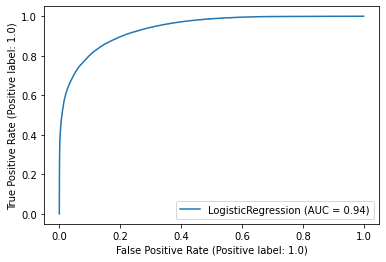

In [ ]:
metrics.plot_roc_curve(classifier_lg,x_test, y_test)
plt.show()

In [ ]:
# K nearest neighbours

In [ ]:
# ELbow method 

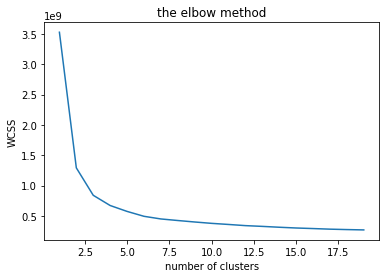

In [ ]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)
plt.plot(range(1,20),WCSS)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
classifier_knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
y_pred1=classifier_knn.predict(x_test)
cm_KN=confusion_matrix(y_test,y_pred1)
print(cm_KN)
accuracy_score(y_test,y_pred1)

[[36587  4726]
 [ 8107 33373]]


0.844998973343157

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_knn, X= x_train, y= y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Accuracy: 84.38 %
Standard Deviation: 0.17 %


0.923656417465079


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


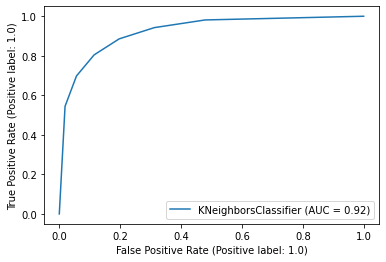

In [ ]:
import sklearn.metrics as metrics
probs = classifier_knn.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

metrics.plot_roc_curve(classifier_knn,x_test, y_test)
plt.show()

In [ ]:
# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB()
classifier_nb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
y_pred2=classifier_nb.predict(x_test)
cm_NB=confusion_matrix(y_test,y_pred2)
print(cm_NB)
accuracy_score(y_test,y_pred2)

[[23904 17409]
 [ 1409 40071]]


0.7727102532822823

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_nb, X= x_train, y= y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Accuracy: 77.16 %
Standard Deviation: 1.30 %


0.9229705242437248


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


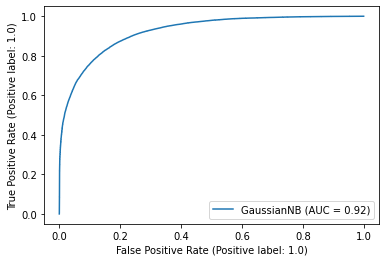

In [ ]:
import sklearn.metrics as metrics
probs = classifier_nb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

metrics.plot_roc_curve(classifier_nb,x_test, y_test)
plt.show()

In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
y_pred3=classifier_dt.predict(x_test)
cm_DT=confusion_matrix(y_test,y_pred3)
print(cm_DT)
accuracy_score(y_test,y_pred3)

[[33843  7470]
 [ 7342 34138]]


0.8210959863756597

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_dt, X= x_train, y= y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.84 %
Standard Deviation: 0.12 %


0.8210913029213371


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


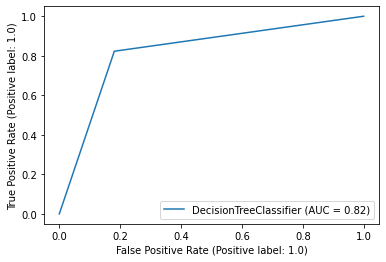

In [ ]:
import sklearn.metrics as metrics
probs = classifier_dt.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

metrics.plot_roc_curve(classifier_dt,x_test, y_test)
plt.show()

In [ ]:
# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
y_pred4=classifier.predict(x_test)
cm_RF=confusion_matrix(y_test,y_pred4)
print(cm_RF)
accuracy_score(y_test,y_pred4)

[[36404  4909]
 [ 6977 34503]]


0.8564371384054208

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= x_train, y= y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy: 85.49 %
Standard Deviation: 0.10 %


0.9368279755082773


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


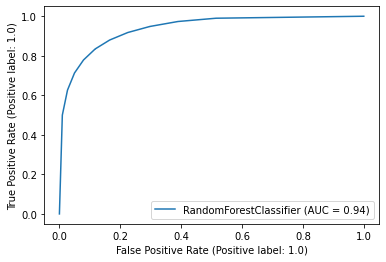

In [ ]:
import sklearn.metrics as metrics
probs = classifier.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

metrics.plot_roc_curve(classifier,x_test, y_test)
plt.show()

In [ ]:
#SVM Classifier 

from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train_new,y_train)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
y_pred5=classifier.predict(x_test_new)
cm_svm=confusion_matrix(y_test,y_pred5)
print(cm_svm)
accuracy_score(y_test,y_pred5)

[[35420  5679]
 [ 6242 35452]]


0.8560143973524332

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= x_train_new, y= y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Accuracy: 85.62 %
Standard Deviation: 0.11 %


0.856055832566177


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


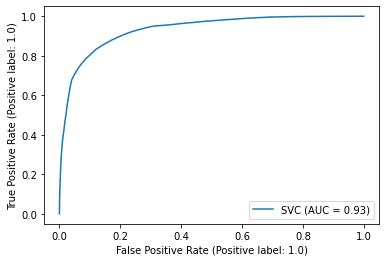

In [ ]:
import sklearn.metrics as metrics
#probs = classifier.predict_proba(x_test_new)
preds = classifier.predict(x_test_new)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

metrics.plot_roc_curve(classifier,x_test_new, y_test)
plt.show()

In [ ]:
# XGBOOST

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
classifier= XGBClassifier()
classifier.fit(x_train,y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
y_pred5=classifier.predict(x_test)
cm_xg=confusion_matrix(y_test,y_pred5)
print(cm_xg)
accuracy_score(y_test,y_pred5)

[[35536  5777]
 [ 5673 35807]]


0.8617032840940659

0.9459947454436848


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


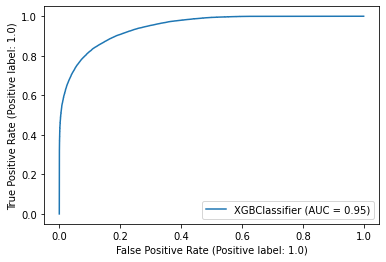

In [ ]:
import sklearn.metrics as metrics
probs = classifier.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
metrics.plot_roc_curve(classifier,x_test, y_test)
plt.show()